## Real_estate_property_price_estimator


## Problem Teardown


We are given dataset of house prices with some features like no of bathrooms, no
of bedrooms, etc.
Our task is to create a model which will predict the price for any new house by
looking at the features.
This problem is supervised Learning, with a regression task and batch learning.
We are going to use Root Mean Square Error as a performace measure.

## Importing libraries and analysing data

In [1]:
import pandas as pd
import numpy as np

In [2]:
housing = pd.read_csv("housing.csv")

In [3]:
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['chas'].value_counts()

chas
0    471
1     35
Name: count, dtype: int64

In [6]:
housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline   
#the graphs will be shown here in notebook

<function matplotlib.pyplot.show(close=None, block=None)>

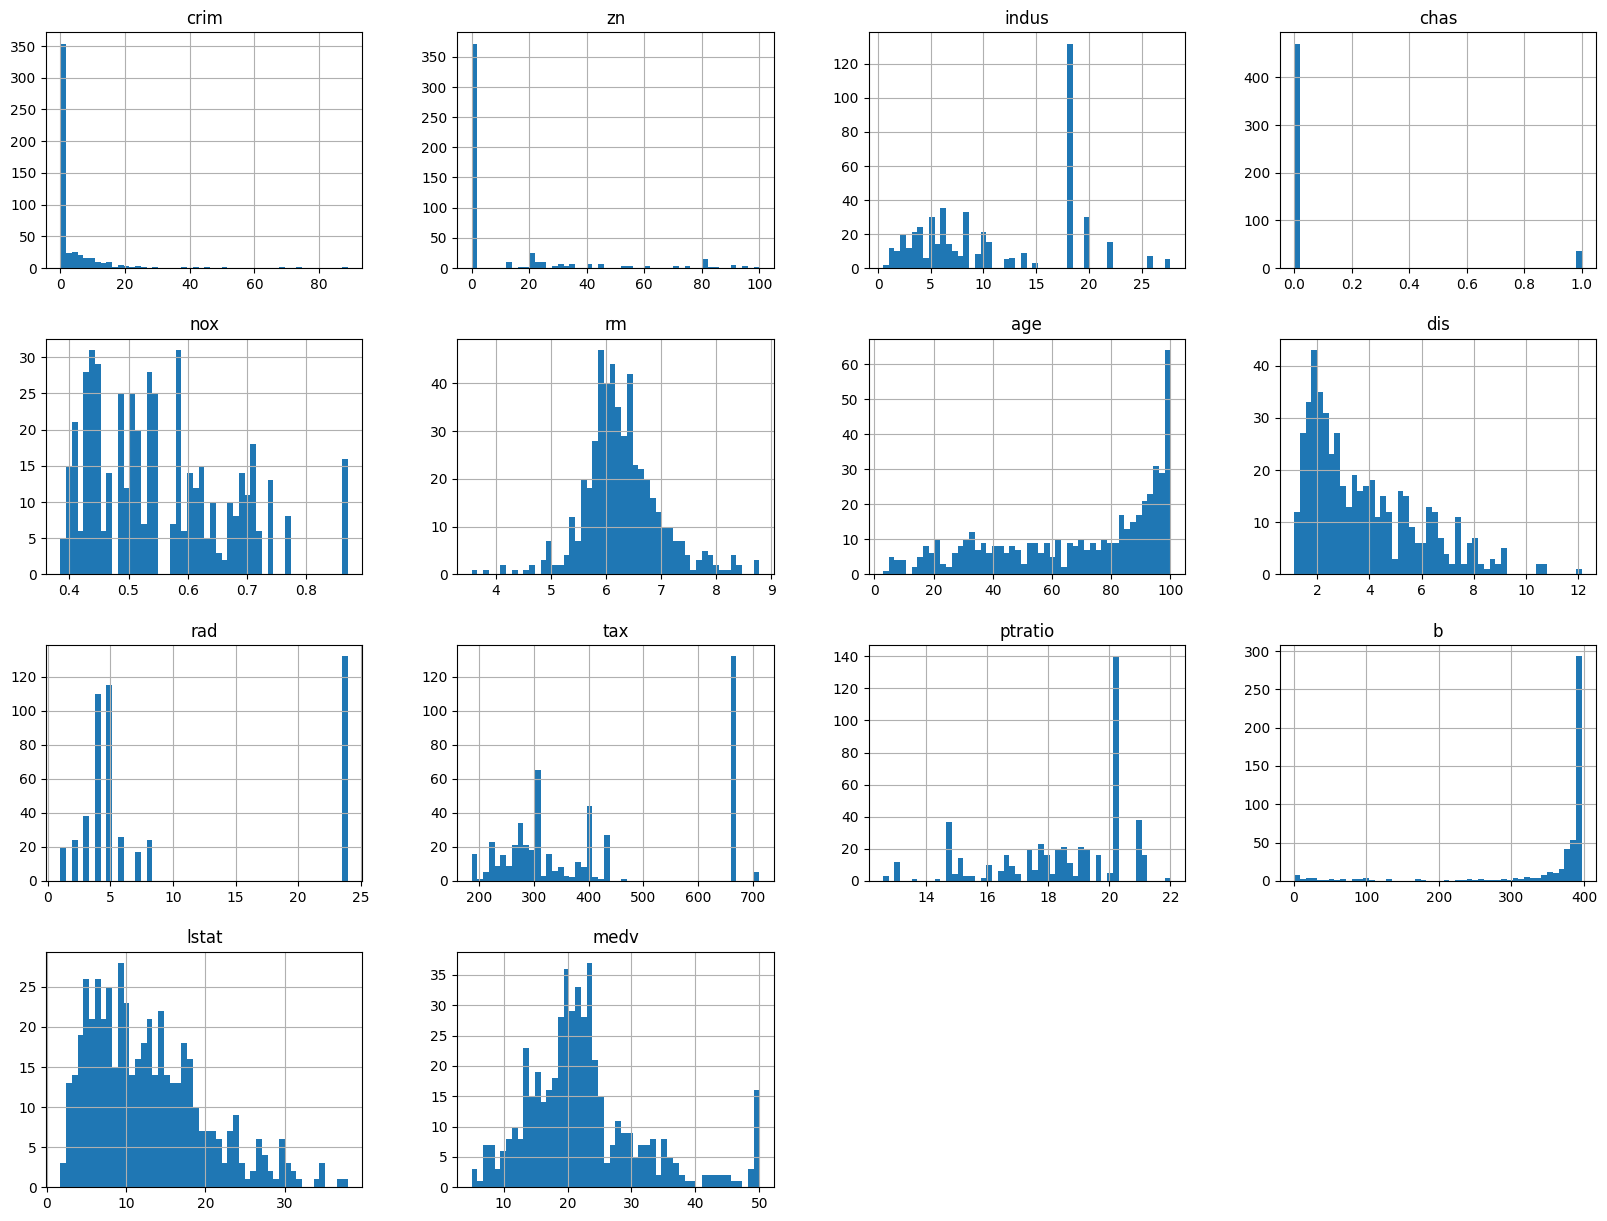

In [8]:
# For plotting histogram
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15)) 
plt.show

## Train-Test Splitting

In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set:{len(test_set)}\n")

## This is how basicaaly above function works
# def split_train_test(data, test_ratio):
#     np.random.seed(42)  # this will make same random permuation every time
#     shuffled = np.random.permutation(len(data))
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

Rows in train set: 404
Rows in test set:102



In [10]:
# we have to do stratified sampling instead of above, because there is a chance that same kind in train set. To prevent that we'll use stratified shuffle split
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) #n_splits is how many splits we want to have, in this case we want one split between data to make it test and train set
                                                                           # dont forget to put random_state=42, it will make same random set everytime otherwise we will get different set everytime
for train_index, test_index in split.split(housing, housing['chas']): # split.split(housing, housing['chas']) based on second parameter, first one will be split
                                                                      #split.split(housing, housing['chas']) will return 2 list of indexes after splitting data, then we are storing the data at location of train_index at strat_train_set
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [11]:
# Check if we have equal ratio in split
strat_test_set['chas'].value_counts()

chas
0    95
1     7
Name: count, dtype: int64

In [12]:
strat_train_set['chas'].value_counts()

chas
0    376
1     28
Name: count, dtype: int64

In [13]:
# Below will show that now ratio is same in both data sets
95/7

13.571428571428571

In [14]:
376/28

13.428571428571429

## Looking for correlations

In [15]:
corr_matrix = housing.corr() # function of pandas
corr_matrix['medv'].sort_values(ascending = False) # pearson co-relation coefficient

medv       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64

array([[<Axes: xlabel='medv', ylabel='medv'>,
        <Axes: xlabel='rm', ylabel='medv'>,
        <Axes: xlabel='zn', ylabel='medv'>,
        <Axes: xlabel='lstat', ylabel='medv'>],
       [<Axes: xlabel='medv', ylabel='rm'>,
        <Axes: xlabel='rm', ylabel='rm'>,
        <Axes: xlabel='zn', ylabel='rm'>,
        <Axes: xlabel='lstat', ylabel='rm'>],
       [<Axes: xlabel='medv', ylabel='zn'>,
        <Axes: xlabel='rm', ylabel='zn'>,
        <Axes: xlabel='zn', ylabel='zn'>,
        <Axes: xlabel='lstat', ylabel='zn'>],
       [<Axes: xlabel='medv', ylabel='lstat'>,
        <Axes: xlabel='rm', ylabel='lstat'>,
        <Axes: xlabel='zn', ylabel='lstat'>,
        <Axes: xlabel='lstat', ylabel='lstat'>]], dtype=object)

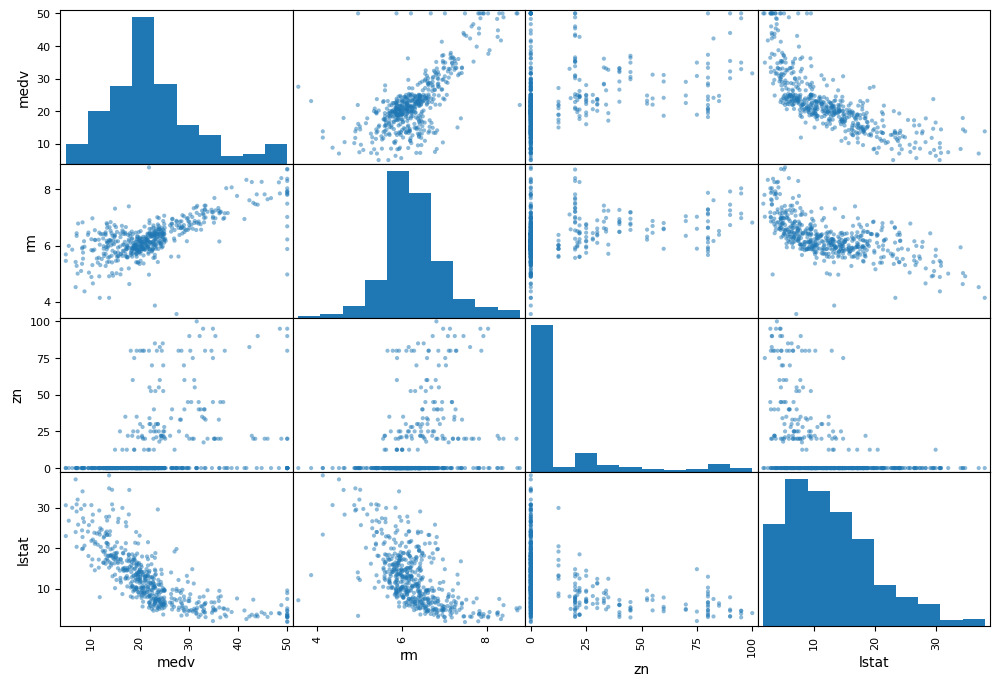

In [16]:
# plotting graph
from pandas.plotting import scatter_matrix
attributes = ["medv","rm","zn","lstat"] #we are only getting graph of those attributes we are ibterested in
scatter_matrix(housing[attributes], figsize = (12,8))

<Axes: xlabel='rm', ylabel='medv'>

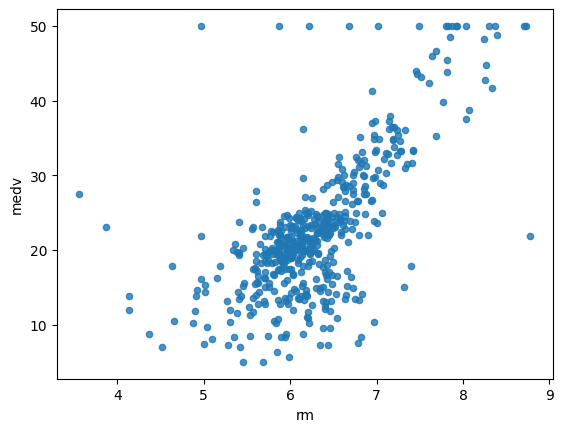

In [17]:
# If we want to zoom in a specific graph
housing.plot(kind="scatter", x="rm", y="medv", alpha=0.8)

## Attribute combination

In [18]:
housing["taxRM"] = housing['tax']/housing['rm'] ## new variable tax per room

In [19]:
housing.head()
# Here you can see new variable in last column

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,taxRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


In [20]:
corr_matrix = housing.corr() # function of pandas
corr_matrix['medv'].sort_values(ascending = False) # pearson co-relation coefficient

medv       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
taxRM     -0.537650
lstat     -0.737663
Name: medv, dtype: float64

<Axes: xlabel='taxRM', ylabel='medv'>

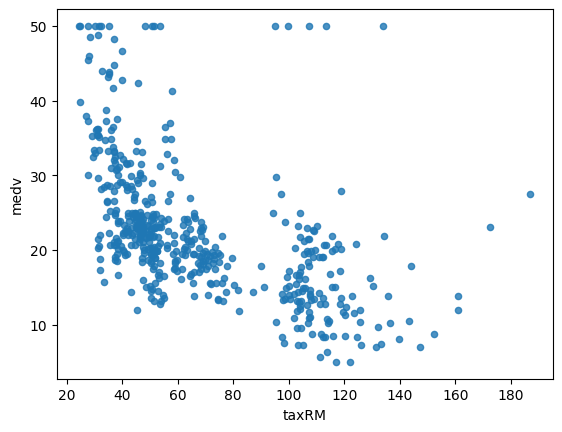

In [21]:
housing.plot(kind ="scatter", x="taxRM", y='medv', alpha=0.8)

In [22]:
# Now we will copy our data for testing
housing = strat_train_set.drop("medv", axis=1)
housing_labels = strat_train_set["medv"].copy()

## Missing Attributes

In [23]:
# TO take care of missing attributed, you have three options:
#     1. Get rid og the missing data points
#        a = housing.dropna(subset=['rm']).shape  *this creates of copy where rm is dropped, original data will remain unchanged
#     2. Get rid of the whole attribute
#        housing.drop('rm', axis =1).shape    * Note that there is no rm column and Original housing dataframne will be unchanged
#     3. Set the value to some value(0, mean or medium)
#        median = housing['rm'].median()
#        housing['rm'].fillna(median)         * this will fill the empty cells with median value, original data will remain unchanges

In [24]:
# This will do same work as option 3, fillimng n/a values in data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [25]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [26]:
X = imputer.transform(housing)

In [27]:
housing_tr = pd.DataFrame(X, columns = housing.columns)

In [28]:
housing_tr.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

Primarily, three types of objects

    Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters

    Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

    Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.



## Feature Scaling

Primarily, two types of feature scaling methods:

    Min-max scaling (Normalization) (value - min)/(max - min) Sklearn provides a class called MinMaxScaler for this

    Standardization (value - mean)/std Sklearn provides a class called StandardScaler for this



## Creating a Pipeline

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),   # This will scale all the values
])

In [30]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [31]:
housing_num_tr.shape

(404, 13)

## Selecting a desired model for Dragon Real Estates

We will try out three different models for our problem

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model_LR = LinearRegression()
model_DTR = DecisionTreeRegressor()
model_RFR = RandomForestRegressor()
model_LR.fit(housing_num_tr, housing_labels)
model_DTR.fit(housing_num_tr, housing_labels)
model_RFR.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [33]:
some_data = housing.iloc[:5]

In [34]:
some_labels = housing_labels.iloc[:5]

In [35]:
prepared_data = my_pipeline.transform(some_data)

In [36]:
model_LR.predict(prepared_data)

array([23.94996893, 27.21690623, 20.58079789, 25.04088721, 23.76177838])

In [37]:
model_DTR.predict(prepared_data)

array([21.9, 24.5, 16.7, 23.1, 23. ])

In [38]:
model_RFR.predict(prepared_data)

array([22.422, 25.629, 16.637, 23.494, 23.659])

In [39]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [40]:
from sklearn.metrics import mean_squared_error
housing_predictions = model_LR.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)    # this is the root mean square error
rmse

4.829321492635759

In [41]:
from sklearn.metrics import mean_squared_error
housing_predictions = model_DTR.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)    # this is the root mean square error
rmse

0.0

In [42]:
from sklearn.metrics import mean_squared_error
housing_predictions = model_RFR.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)    # this is the root mean square error
rmse

1.231050795816804

We just noticed if we use DecisionTreeRegressor model we will get 0 error, its not because its the best model, its because of overfitting on our training data (Our model has learned about the noise.) Thats why we will need a better evaluating model.

## Using better evaluation technique - Cross Validation

In [43]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())
    print("\n")

Calculating values


In [44]:
from sklearn.model_selection import cross_val_score
models_list = [model_LR, model_DTR, model_RFR]
for i in range(len(models_list)):
    scores = cross_val_score(models_list[i], housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)
    print_scores(rmse_scores)

Scores: [4.21674442 4.26026816 5.1071608  3.82881892 5.34093789 4.3785611
 7.47384779 5.48226252 4.14885722 6.0669122 ]
Mean:  5.030437102767306
Standard deviation:  1.0607661158294837


Scores: [3.70767168 5.66775217 5.5919149  3.9683504  3.98826403 2.98270012
 5.13281112 3.92125618 3.19679527 3.86400052]
Mean:  4.202151637515171
Standard deviation:  0.8933939292884961


Scores: [2.77053217 2.83543075 4.38429501 2.51051574 3.29394261 2.77284757
 4.6878099  3.28954058 3.13484069 3.26692857]
Mean:  3.2946683575959335
Standard deviation:  0.6728507251947761




## Saving the model

In [45]:
from joblib import dump, load
dump(model_DTR, 'Property_estimator_DTR.joblib') 
dump(model_LR, 'Property_estimator_LR.joblib') 
dump(model_RFR, 'Property_estimator_RFR.joblib') 

['Property_estimator_RFR.joblib']

## Using the model

We have to import specific required model, then provide that 13 required features and it will estimate a price for us.

In [46]:
from joblib import dump, load
import numpy as np
model = load('Property_estimator_DTR.joblib') 
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

array([21.9])

In [47]:
model = load('Property_estimator_LR.joblib') 
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

array([23.95433455])

In [48]:
model = load('Property_estimator_RFR.joblib') 
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])
model.predict(features)

array([24.343])